In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import all our modeling functions
from modeling import * 

# Import the scaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Set the plot style
plt.style.use('fivethirtyeight')

In [2]:
processed_data_path = '../data/processed_adj_close_prices.csv'
adj_close_prices = pd.read_csv(processed_data_path, index_col='Date', parse_dates=True)

tsla_prices = adj_close_prices[['TSLA']] 

# Create a scaler object
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit and transform the data
scaled_data = scaler.fit_transform(tsla_prices)

train_data_scaled, test_data_scaled = split_data(scaled_data)

train_data_unscaled, test_data_unscaled = split_data(tsla_prices)

Splitting data into 80.0% training and 19.999999999999996% testing...
Training data points: 2028
Testing data points: 507
Splitting data into 80.0% training and 19.999999999999996% testing...
Training data points: 2028
Testing data points: 507


In [3]:
look_back = 60

X_train, y_train = create_lstm_dataset(train_data_scaled, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (1968, 60, 1)
Shape of y_train: (1968,)


In [4]:
lstm_model = build_and_train_lstm(X_train, y_train, epochs=50)

os.makedirs('../models', exist_ok=True) 
lstm_model.save('../models/lstm_model_tsla.h5')
print("\nModel saved to ../models/lstm_model_tsla.h5")


Building and training LSTM model...


/home/fua/miniconda3/envs/gmf_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0080
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0017
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0015
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0013
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0013
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0012
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0011
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0011
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.0010    
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0010    
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.8438e-04
Epoch 12/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 9.5146e-04
Epoch 13/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 9.5097e-04
Epoch 14/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 9.3765e-04
Epoch 15/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/

LSTM model training complete.

Model saved to ../models/lstm_model_tsla.h5


In [5]:
inputs = scaled_data[len(scaled_data) - len(test_data_scaled) - look_back:]

X_test, y_test = create_lstm_dataset(inputs, look_back)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predictions_scaled = lstm_model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [6]:
predictions = scaler.inverse_transform(predictions_scaled)


test_data_values = test_data_unscaled.values

evaluate_forecast(test_data_values, predictions.flatten(), model_name="LSTM")


--- LSTM Model Evaluation ---
Mean Absolute Error (MAE): 13.48
Root Mean Squared Error (RMSE): 17.89
Mean Absolute Percentage Error (MAPE): 28.29%


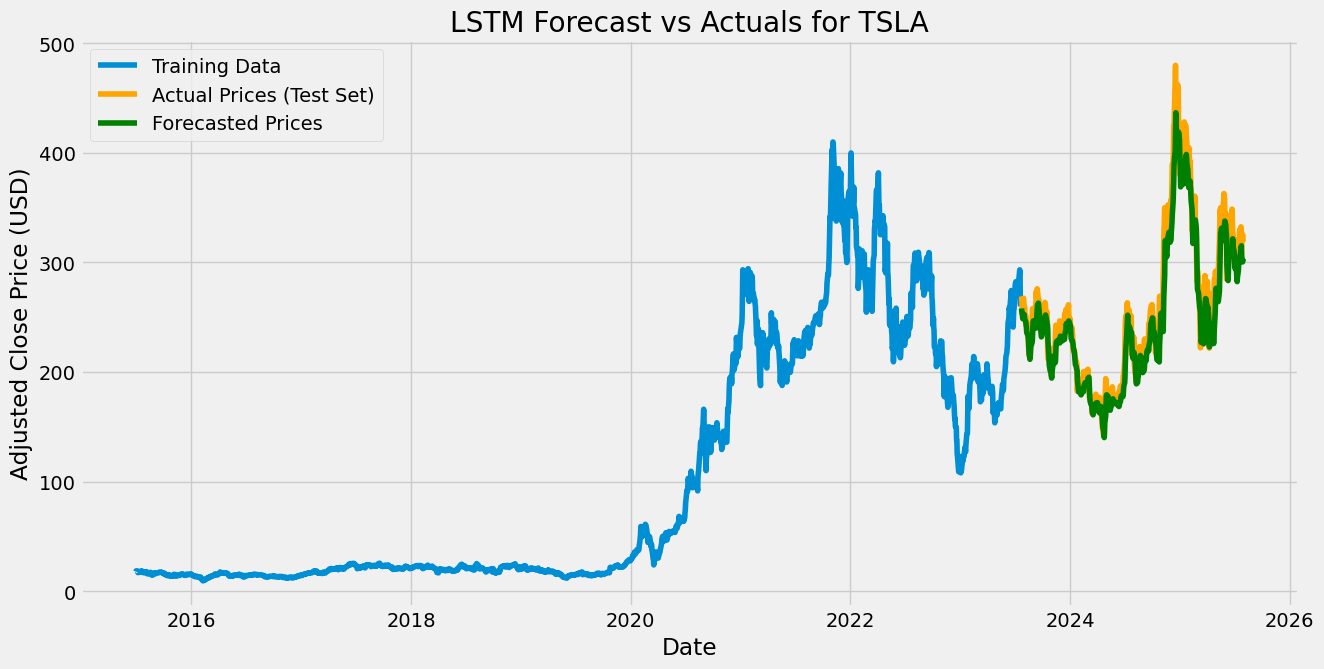

/home/fua/Documents/GMF_TimeSeries_Project/src/modeling.py:144: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


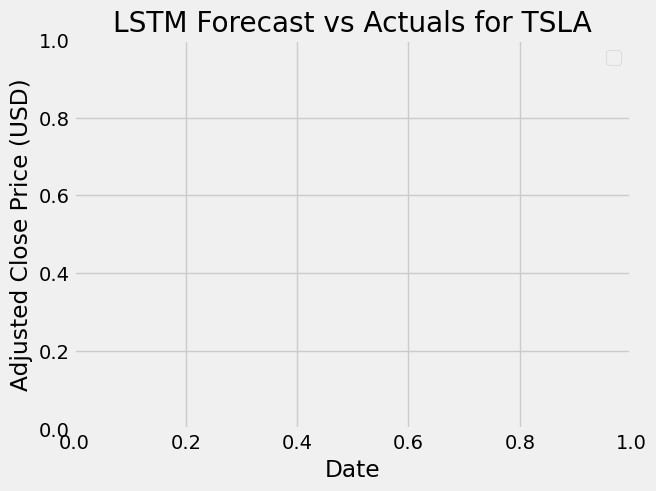

In [7]:
# Ploting the forecast against the actual prices
plot_lstm_forecast(train_data_unscaled, test_data_unscaled, predictions, model_name="LSTM")